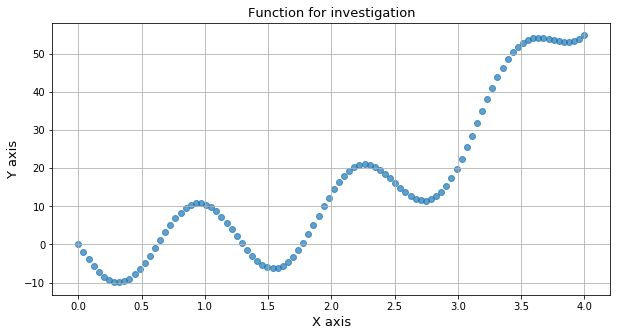

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


def func(x):
    return x**3 - 10. * np.sin(5. * x)

x = np.linspace(0, 4, 100)
y = func(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, alpha = 0.7)
ax.set_title('Function for investigation', fontsize=13)
ax.set_xlabel('X axis', fontsize=13)
ax.set_ylabel('Y axis', fontsize=13)

ax.grid('on')
plt.show()

# 1. Метод золотого сечения.

Один из самых простых методов нахождения локального минимума функции одной переменной на некотором отрезке.
Очень похож в целом на метод деления отрезка пополам, но видимо сходится быстрее, и решается за линейное время.
Не всегда находит глобальный минимум, может остановиться в локальном.

Основан на том факте, что для достижения сходимости нам необходимо выбирать отрезки для поиска минимума в пропорции золотого сечения, так  чтобы:

\begin{equation*}
   \frac{b-a}{b-x_{1}} = \frac{b-a}{x_{2}-a} = \Phi,
\end{equation*}

откуда можно выразить формулы для нахождения точке внутри границы:
\begin{equation*}
   x_{1} = a + \frac{b-a}{\Phi}, \\
   x_{2} = b + \frac{b-a}{\Phi}
\end{equation*}

И при нахождениии значений в точках $x_{1}, x_{2}$ сравнить их, и оказавшееся большее значение сделать новой (правой или левой границей) и вычислить соответствущую точку разбиения ($x_{1}$ или $x_{2}$). 
Повторять до достижения выбранной точности.
Подробней можно посмотреть [тут](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F).

In [123]:
def golden_section(left, right, max_iter = 1e5, eps = 1e-5):
    phi = 0.5 * (1.0 + np.sqrt(5.0))
    x1 = right - (right - left) / phi
    x2 = left  + (right - left) / phi
    cur_iter = 0
    
    while cur_iter < max_iter:
        cur_iter  = cur_iter + 1
        # Find local minimum value
        if np.abs(x2-x1) < eps:
            print('Number of iterations = {0}'.format(cur_iter))
            return (x2 + x1) / 2.
        
        x1 = right - (right - left) / phi
        x2 = left  + (right - left) / phi
        
        if func(x1) >= func(x2):
            left = x1
        else:
            right = x2
    return -1.
            
x_min = golden_section(0, 4.)
print(x_min)
print(x[np.argmin(y)])

Number of iterations = 26
1.54215680973
0.323232323232


# 2. Метод парабол.

Основная фишка в том, что метод  делает:
1. Апроксимирует график функции в данной ($x_{0}$) точке параболой по точкам ($x_{0}-h$, $x_{0}$, $x_{0}+h$).
2. Находит где должна быть вершина у апроксимирующей параболы.
3. Следующий шаг начинается из найденной точки.

Если необходимо почитать подробнее то можно пройти по [этой](http://dssp.petrsu.ru/p/tutorial/meth_calc/files/12.shtml) ссылке.


In [138]:
def parabola(x0, h, max_iter = 1e5, eps = 1e-4, tau = 0.1):
    cur_iter = 0
    
    while cur_iter < max_iter:
        cur_iter = cur_iter + 1
        
        der_f = 0.5*(func(x0+h)-func(x0-h)) / h
        der_s = (func(x0+h)-2.0*func(x0)+func(x0-h))/ h**2
        
        step = der_f / der_s
        
        # If second deriviative is less than zero than
        # we make a big step in opposite side
        if der_s < 0:
            step = - 10. * h
        # HERE I DONT UNDERSTAND HOW TO MAKE GOOD
        elif func(x0-step) > func(x0):
            step = tau * (step)
            tau /= 2.
            
        x1 = x0 - step
        
        if np.abs(x1 - x0) < eps:
            print('Number of iterations = {0}'.format(cur_iter))
            return (x1 + x0) / 2.
        else:
            x0 = x1
            
    return -1
    
x_min = parabola(2.0, 0.001)
print(x_min)
print(x[np.argmin(y)])

Number of iterations = 55
2.73439319987
0.323232323232


# 3. Минимизация функционала.

Рассмотрим постановку задачи нахождения минимумума некоторого функционала в многомерном пространстве:

\begin{equation*}
    \Phi(r) \rightarrow min_{r}
\end{equation*}

Пусть имеетсе некоторое приближение $x_{0}$.
Тогда на основании информации от оракула в точке $x_{0}$ метод многомерной оптимизации строит некоторое направление $d_{0}$ и решает задачу одномерной оптимизации вдоль выделенного направления следующего вида:

\begin{equation*}
    \alpha_{0} = arg min_{\alpha} \Phi(x_{0} + \alpha d_{0}),
\end{equation*}

После того как найдено решение данной задачи мы переходим к следующей точке $x_{1} = x_{0} + \alpha_{0} *d_{0}$, и затем повторяем процесс до тех пор пока не будет выполнен один из критериев остановки алгоритма ($x_{k+1}-x_{k}|<\epsilon$, $|f(x_{k+1})-f(x_{k})|<\epsilon$).

В результате основыне отличия методов оптимизации основанных на таких подходах это:
1. Выбор направления движения.
2. Выбор шага движения вдоль выбранного направления.


## 3.1 Координатный спуск.

Тут направление движения происходит поочередно вдоль всех осей, а шаг такой что вдоль данного напрваления точно решается задача оптимизации вдоль данного напрваления.

Для сходимости (линейной) необходима положителная определенность внутри линии уровня, на которой находится точка старта алгоритма. (теорема доказана на листке)

Плюсы метода:
1. Очень прост в имплементации и хорошо применим для пространств большой размерности.
2. Отсутствие вычисления производных.

Минусы метода:
1. В случае с истинным оврагом при попадании в острую точку невозмоно выйти из нее (остановка посередине алгоритма без достижения минимума).
2. Возможность совершения большого числа маленьких шагов (пример снизу при большом числе вытянутых элипсов)


Доказательство сходимости для функции которая внури границы построенной как линия уровне от начального приближения является положительно определенной квадратичной формой на листочке.

Теорема о среднем - она же [теорема Лагранжа](http://ru.morfey13.wikia.com/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%BE_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BC_%D0%A0%D0%BE%D0%BB%D0%BB%D1%8F,_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0_%D0%B8_%D0%9A%D0%BE%D1%88%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%B4%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D1%83%D0%B5%D0%BC%D1%8B%D1%85_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9.).

Дополнительные [материалы](http://www.machinelearning.ru/wiki/images/7/74/MOMO12_minnd_basic.pdf) из курса ML.


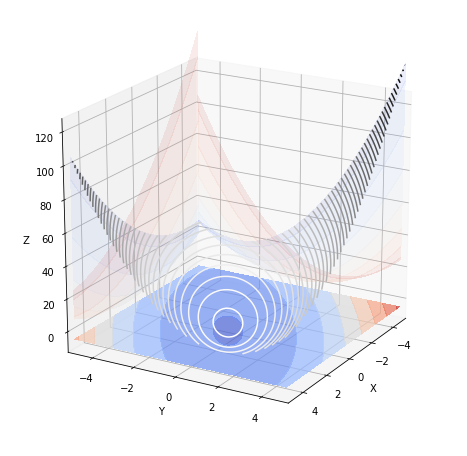

In [687]:
def f(x, y):
    # Быстро сходится
    return 2.*x**2 - 2.*x*y + y**2 + 2.*x - 2.*y
    # Медленно сходится
    #return 5.*x**2-9.*x*y+4.075*y**2+x
    
size = 100
ofset = 5.
X = np.linspace(-ofset, ofset, size)
XX = [X for i in xrange(size)]
Y = np.linspace(-ofset, ofset, size)
YY = [np.full((size), y) for y in Y]
Z = np.array([f(x, y) for x in X for y in Y]).reshape(X.shape[0], X.shape[0])


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
cset = ax.contour3D(X, Y, Z, 50, cmap='binary')
cset = ax.contourf(X, Y, Z, zdir='z', offset=-ofset, cmap=cm.coolwarm, alpha = 0.7)
cset = ax.contourf(XX, YY, Z, zdir='x', offset=-ofset, cmap=cm.coolwarm,  alpha = 0.1)
cset = ax.contourf(XX, YY, Z, zdir='y', offset=-ofset, cmap=cm.coolwarm,  alpha = 0.1)

ax.set_xlabel('X')
ax.set_xlim(-ofset, ofset)
ax.set_ylabel('Y')
ax.set_ylim(-ofset, ofset)
ax.set_zlabel('Z')
ax.set_zlim(-10, 125)

ax.view_init(20, 30)

plt.show()

Ниже реализован метод золотого сечения, описанный выше только для возможности двухмерного использования (можно делать шаги вдоль оси $X$ и вдоль оси $Y$).

In [688]:
def golden_section_2d(left, right, function, fix_id, fix_val, 
                   max_iter = 1e5, eps = 1e-5):
    change_id = 1 - fix_id
    
    phi = 0.5 * (1.0 + np.sqrt(5.0))
    x1 = right - (right - left) / phi
    x2 = left  + (right - left) / phi
    cur_iter = 0
    
    while cur_iter < max_iter:
        cur_iter  = cur_iter + 1
        # Find local minimum value
        if np.abs(x2-x1) < eps:
            return (x2 + x1) / 2.
        
        x1 = right - (right - left) / phi
        x2 = left  + (right - left) / phi
        
        X1 = np.zeros(2)
        X1[fix_id] = fix_val
        X1[change_id] = x1
        
        X2 = np.zeros(2)
        X2[fix_id] = fix_val
        X2[change_id] = x2
        
        if function(X1[0], X1[1]) >= function(X2[0], X2[1]):
            left = x1
        else:
            right = x2
    return -1.

Собственно сам метод координатного спуска.

In [689]:
steps = [[], []]

def coordinate_descent(start, max_iter = 1e5, eps = 1e-6):
    for i in range(2):
            steps[i].append(start[i])
    cur_iter = 0
    while cur_iter < max_iter:
        cur_iter += 1
        tmp = start.copy()
        # Step along X-direction
        start[0] = golden_section_2d(-ofset, ofset, f, 1, start[1])
        # Store intermidiate point
        for i in range(2):
            steps[i].append(start[i])
        # Step along Y-direction
        start[1] = golden_section_2d(-ofset, ofset, f, 0, start[0])
        # Store intermidiate point
        for i in range(2):
            steps[i].append(start[i])
        
        if np.abs(f(tmp[0], tmp[1]) - f(start[0], start[1])) < eps:
            print('Number of iterations : {0}'.format(cur_iter))
            for i in range(2):
                steps[i].append((start[i] + tmp[i]) / 2)
            return (start + tmp) / 2.

pts = coordinate_descent(np.array([0., 0.]))
print('Minimum of function is achived at point A({:.3f}, {:.3f})'.format(pts[0], pts[1]))

Number of iterations : 11
Minimum of function is achived at point A(-0.001, 0.999)


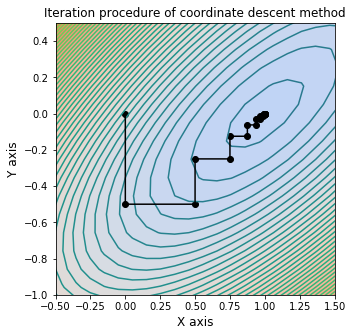

In [690]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.contourf(X, Y, Z, 100, cmap=cm.coolwarm, levels=np.linspace(-5, 5, 100))
ax.contour(X, Y, Z, 100, levels=np.linspace(-5, 5, 100))
ax.plot(steps[1], steps[0], color='k')
ax.scatter(steps[1], steps[0], color='k')

ax.set_title('Iteration procedure of coordinate descent method')
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_xlim([-0.5,1.5])
ax.set_ylim([-1.,0.5])

plt.show()

# 4. Метод наискорейшего спуска.

**Видимо приближения не перпендикулярны в 2D но в 3D будут НО ЭТО НЕ ТОЧНО**.

Как мы видили ранее для методоа **покоординатного спуска** существуют проблемы связанные с тем что он двигается только вдоль осей координат. 
Необходимо модифициоровать метод так, чтобы была возможность движения по диагонали. 
Что приводит нас к градиентным методам, основная концепция которых проста необходимо выбрать направление движения к минимуму и шаг, с величину шага.

Метод наискорейшего спуска это фактически градиентный метод, у которого:
1. Направление спуска осуществляется по антиградиенту.
2. Величина шага такая, что на каждом шаге достигается минимум функции по данному направлению. То есть решается одномерная оптимизационная задача вдоль выбранного направления (например методом золотого сечения).

Подробнее можно смотреть [тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0)

Очевидно что направления перпендикулярны линиям уровня, и тогда мы совершаем движения градиента в направлениях перпендикулярным направлению изначального градиента. Легко про ортогональность [тут](http://www.machinelearning.ru/wiki/images/7/74/MOMO12_minnd_basic.pdf).

**Вывод примера с квадратичной функцийей (парабола есть на листочке)**.

Плюс отметить про градиент, стоахостический градиент.

In [747]:
def grad_f(x, y, i):
    if i == 0:
        return 4.*x - 2.*y + 2.
    elif i == 1:
        return -2.*x + 2.*y - 2.

# Тут по сути надо решать методом золотого сечения только вдоль направления
# я тут сделал самый простой вариант  - перебод скорости обучения из диапазона.
def find_lr(point):
    res = []
    lr = np.linspace(0, 10, 100)
    cur_point = point.copy()
    for cur_lr in lr:
        cur_point[0] = point[0] - cur_lr * grad_f(point[0],point[1], 0)
        cur_point[1] = point[1] - cur_lr * grad_f(point[0],point[1], 1)
        res.append(f(cur_point[0], cur_point[1]))
    return lr[np.argmin(res)]
    
steps = [[], []]

def fast_gradient(start, max_iter = 1e5, eps = 1e-6):
    for i in range(2):
            steps[i].append(start[i])
    k = 0.0
    cur_iter = 0
    while cur_iter < max_iter:    
        cur_iter += 1
        tmp = start.copy()
        # Step along X-direction
        k = find_lr(start)
        #print('first k = {0}'.format(k))
        #k = find_l(start, np.array([-2., -2.]), np.array([2., 2.]), f)
        #print(k)
        start[0] = start[0] - k * grad_f(start[0], start[1], 0)
        start[1] = start[1] - k * grad_f(start[0], start[1], 1)
        
        # Store intermidiate point
        for i in range(2):
            steps[i].append(start[i])
            
        if np.abs(f(tmp[0], tmp[1]) - f(start[0], start[1])) < eps:
            print('Number of iterations : {0}'.format(cur_iter))
            for i in range(2):
                steps[i].append((start[i] + tmp[i]) / 2)
            return (start + tmp) / 2.

pts = fast_gradient(np.array([0., 0.]))
print('Minimum of function is achived at point A({:.3f}, {:.3f})'.format(pts[0], pts[1]))

Number of iterations : 18
Minimum of function is achived at point A(0.001, 1.000)


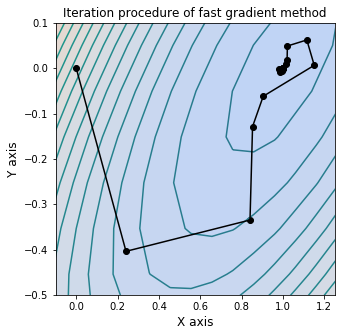

In [748]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.contourf(X, Y, Z, 100, cmap=cm.coolwarm, levels=np.linspace(-5, 5, 100))
ax.contour(Y, X, Z, 10, levels=np.linspace(-5, 5, 100))
ax.plot(steps[1], steps[0], color='k')
ax.scatter(steps[1], steps[0], color='k')

ax.set_title('Iteration procedure of fast gradient method')
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_xlim([-0.1,1.25])
ax.set_ylim([-0.5,0.1])

plt.show()

## Метод сопряженных градиентов.

хорошо [тут](https://www.youtube.com/watch?v=IlVx_t0VseU) и [тут](https://www.youtube.com/watch?v=h4cG8jLGmKg) на листочке и [тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D1%8B%D1%85_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2)


[Linear programing](https://math.stackexchange.com/questions/896388/why-maximum-minimum-of-linear-programming-occurs-at-a-vertex)


## Задача линейного программирования.

Переход к канонической форме [тут](https://ocw.mit.edu/courses/sloan-school-of-management/15-053-optimization-methods-in-management-science-spring-2013/tutorials/MIT15_053S13_tut06.pdf).

Основной алогритм метода симплекс метода по МАКСИМИЗАЦИИ можно посмотреть [тут](http://college.cengage.com/mathematics/larson/elementary_linear/4e/shared/downloads/c09s3.pdf).
Задачу нахождения МИНИМУМА можно решить используя симплекс метод через задачу поиска максимума, изложенную выше. Как это сделать можно найти [тут](http://college.cengage.com/mathematics/larson/elementary_linear/4e/shared/downloads/c09s4.pdf)

Основаня иде в том что решение такой линейной задачи находится на границе области, а скорее всего в точках этого многоугольника. Поэтому ищем среди них - симплекс метод находит вершину, из нее идет по ребру вдоль которого значение ыункции уменьшается, доходит до следующей вершины и продолжает так идти дальше.